In [1]:
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from astropy.io.ascii import read
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
import fitsio
import seaborn

In [35]:
# Reading in the RedMaPPer iSEDfit catalog.
rmpath = os.path.join(os.sep, 'global', 'work', 'projects', 'redmapper')
rmcatfile = os.path.join(rmpath, 'redmapper_isedfit_v5.10_centrals.fits.gz')
rminfo = fitsio.FITS(rmcatfile)
rmcat = rminfo[1].read(columns=['Z', 'MSTAR_50', 'ILUM', 'LAMBDA_CHISQ'])

In [42]:
def cutter(lbounds, zbounds):
    lkeep = np.where(rmcat['LAMBDA_CHISQ'] > lbounds[0] * (rmcat['LAMBDA_CHISQ'] < lbounds[1]))[0]
    zkeep = np.where(rmcat['Z'] > zbounds[0] * (rmcat['Z'] < zbounds[1]))[0]
    return lkeep, zkeep

/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Tried to set a label via parameter 'y' in func 'scatter' but couldn't find such an argument. 
(This is a programming error, please report to the matplotlib list!)
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


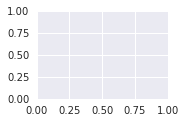

In [45]:
fig = plt.figure()
ax1 = fig.add_subplot(331)
ax1.scatter()